# Comprehensive Estimator Benchmarking

This notebook demonstrates the full benchmarking system of LRDBenchmark, showing how to systematically compare estimators across different data types, contamination scenarios, and performance metrics.

## Overview

The comprehensive benchmarking system allows you to:

1. **Compare Estimators**: Test multiple estimators on the same data
2. **Contamination Testing**: Evaluate robustness under various contamination scenarios
3. **Performance Metrics**: Measure accuracy, speed, and reliability
4. **Statistical Analysis**: Generate confidence intervals and significance tests
5. **Visualization**: Create publication-ready plots and tables

## Table of Contents

1. [Setup and Imports](#setup)
2. [Benchmark System Overview](#overview)
3. [Classical Estimator Benchmarking](#classical)
4. [ML and Neural Network Benchmarking](#ml-neural)
5. [Contamination Robustness Testing](#contamination)
6. [Performance Analysis](#performance)
7. [Results Visualization](#visualization)
8. [Summary and Next Steps](#summary)


## 1. Setup and Imports {#setup}

First, let's import all necessary libraries and set up the comprehensive benchmarking system.


In [1]:
# Standard scientific computing imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import time
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Set random seed for reproducibility
np.random.seed(42)

# Import LRDBenchmark benchmarking system
from lrdbenchmark.analysis.benchmark import ComprehensiveBenchmark

# Import data models
from lrdbenchmark.models.data_models.fbm.fbm_model import FractionalBrownianMotion
from lrdbenchmark.models.data_models.fgn.fgn_model import FractionalGaussianNoise
from lrdbenchmark.models.data_models.arfima.arfima_model import ARFIMAModel

# Import estimators for comparison
from lrdbenchmark.analysis.temporal.rs.rs_estimator_unified import RSEstimator
from lrdbenchmark.analysis.temporal.dfa.dfa_estimator_unified import DFAEstimator
from lrdbenchmark.analysis.spectral.gph.gph_estimator_unified import GPHEstimator
from lrdbenchmark.analysis.machine_learning.random_forest_estimator_unified import RandomForestEstimator
from lrdbenchmark.analysis.machine_learning.svr_estimator_unified import SVREstimator

print("✅ All imports successful!")
print("🚀 Ready to run comprehensive benchmarks")


✅ All imports successful!
🚀 Ready to run comprehensive benchmarks


## 2. Benchmark System Overview {#overview}

The ComprehensiveBenchmark class provides a unified interface for testing all estimator categories. Let's examine its capabilities and run our first benchmark.


In [2]:
# Initialize the comprehensive benchmark system
print("🔧 Initializing Comprehensive Benchmark System...")
print("=" * 60)

benchmark = ComprehensiveBenchmark(output_dir="benchmark_results")

print("📊 Available benchmark types:")
print("  - 'classical': Classical statistical estimators")
print("  - 'ML': Machine learning estimators")
print("  - 'neural': Neural network estimators")
print("  - 'comprehensive': All estimators combined")

print("\n📊 Available contamination types:")
print("  - 'additive_gaussian': Add Gaussian noise")
print("  - 'multiplicative_noise': Multiplicative noise")
print("  - 'outliers': Add outliers")
print("  - 'trend': Add trend")
print("  - 'seasonal': Add seasonal patterns")
print("  - 'missing_data': Remove data points")

print("\n📊 Available data models:")
print("  - 'fbm': Fractional Brownian Motion")
print("  - 'fgn': Fractional Gaussian Noise")
print("  - 'arfima': ARFIMA processes")
print("  - 'mrw': Multifractal Random Walk")

# Run a simple classical benchmark
print("\n🚀 Running Classical Estimator Benchmark...")
print("=" * 60)

classical_results = benchmark.run_classical_benchmark(
    data_length=1000,
    save_results=True
)

print(f"✅ Classical benchmark completed!")
print(f"Success rate: {classical_results['success_rate']:.1%}")
print(f"Total tests: {classical_results['total_tests']}")
print(f"Successful tests: {classical_results['successful_tests']}")

# Display summary
if 'summary' in classical_results:
    print("\n📊 Benchmark Summary:")
    benchmark.print_summary(classical_results['summary'])


🔧 Initializing Comprehensive Benchmark System...
⚠️ CUDA available but incompatible: CUDA error: out of memory
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.
. Falling back to CPU.
⚠️ CUDA available but incompatible: CUDA error: out of memory
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.
. Falling back to CPU.
📊 Available benchmark types:
  - 'classical': Classical statistical estimators
  - 'ML': Machine learning estimators
  - 'neural': Neural network estimators
  - 'comprehensive': All estimators combined

📊 Available contamination types:
  - 'additive_gaussian': Add Gaussian noise
  - 'multiplicati

W1015 09:01:27.078837  110378 platform_util.cc:218] unable to create StreamExecutor for CUDA:0: : CUDA_ERROR_OUT_OF_MEMORY: out of memory


   ❌ Error with fBm: Unable to initialize backend 'cuda': INTERNAL: no supported devices found for platform CUDA (you may need to uninstall the failing plugin package, or set JAX_PLATFORMS=cpu to skip this backend.)

📊 Testing with fGn data model...
   Generated 1000 clean data points
   🔍 Testing R/S... ✅
   🔍 Testing DFA... ✅
   🔍 Testing DMA... ✅
   🔍 Testing Higuchi... ✅
   🔍 Testing GPH... ✅
   🔍 Testing Whittle... ✅
   🔍 Testing Periodogram... ✅
   🔍 Testing CWT... ✅
   🔍 Testing WaveletVar... ✅
   🔍 Testing WaveletLogVar... ✅
   🔍 Testing WaveletWhittle... ✅
   🔍 Testing MFDFA... ✅
   🔍 Testing WaveletLeaders... ✅

📊 Testing with ARFIMAModel data model...
   Generated 1000 clean data points
   🔍 Testing R/S... ✅
   🔍 Testing DFA... ✅
   🔍 Testing DMA... ✅
   🔍 Testing Higuchi... ✅
   🔍 Testing GPH... ✅
   🔍 Testing Whittle... ✅
   🔍 Testing Periodogram... ✅
   🔍 Testing CWT... ✅
   🔍 Testing WaveletVar... ✅
   🔍 Testing WaveletLogVar... ✅
   🔍 Testing WaveletWhittle... ✅
   🔍 Te

## 3. Contamination Robustness Testing {#contamination}

Real-world data often contains contamination that can affect estimator performance. Let's test how different estimators handle various contamination scenarios.


🧪 Testing Contamination Robustness...

🔍 Testing additive_gaussian contamination...
🚀 Starting LRDBench Benchmark
Benchmark Type: CLASSICAL
Contamination: additive_gaussian (level: 0.5)
Testing 13 estimators...

📊 Testing with fBm data model...
   Generated 1000 clean data points
   Applied additive_gaussian contamination (level: 0.5)
   🔍 Testing R/S... ✅
   🔍 Testing DFA... ✅
   🔍 Testing DMA... ✅
   🔍 Testing Higuchi... ✅
   🔍 Testing GPH... ✅
   🔍 Testing Whittle... ✅
   🔍 Testing Periodogram... ✅
   🔍 Testing CWT... ✅
   🔍 Testing WaveletVar... ✅
   🔍 Testing WaveletLogVar... ✅
   🔍 Testing WaveletWhittle... ✅
   🔍 Testing MFDFA... ✅
   🔍 Testing WaveletLeaders... ✅

📊 Testing with fGn data model...
   Generated 1000 clean data points
   Applied additive_gaussian contamination (level: 0.5)
   🔍 Testing R/S... ✅
   🔍 Testing DFA... ✅
   🔍 Testing DMA... ✅
   🔍 Testing Higuchi... ✅
   🔍 Testing GPH... ✅
   🔍 Testing Whittle... ✅
   🔍 Testing Periodogram... ✅
   🔍 Testing CWT... ✅
  

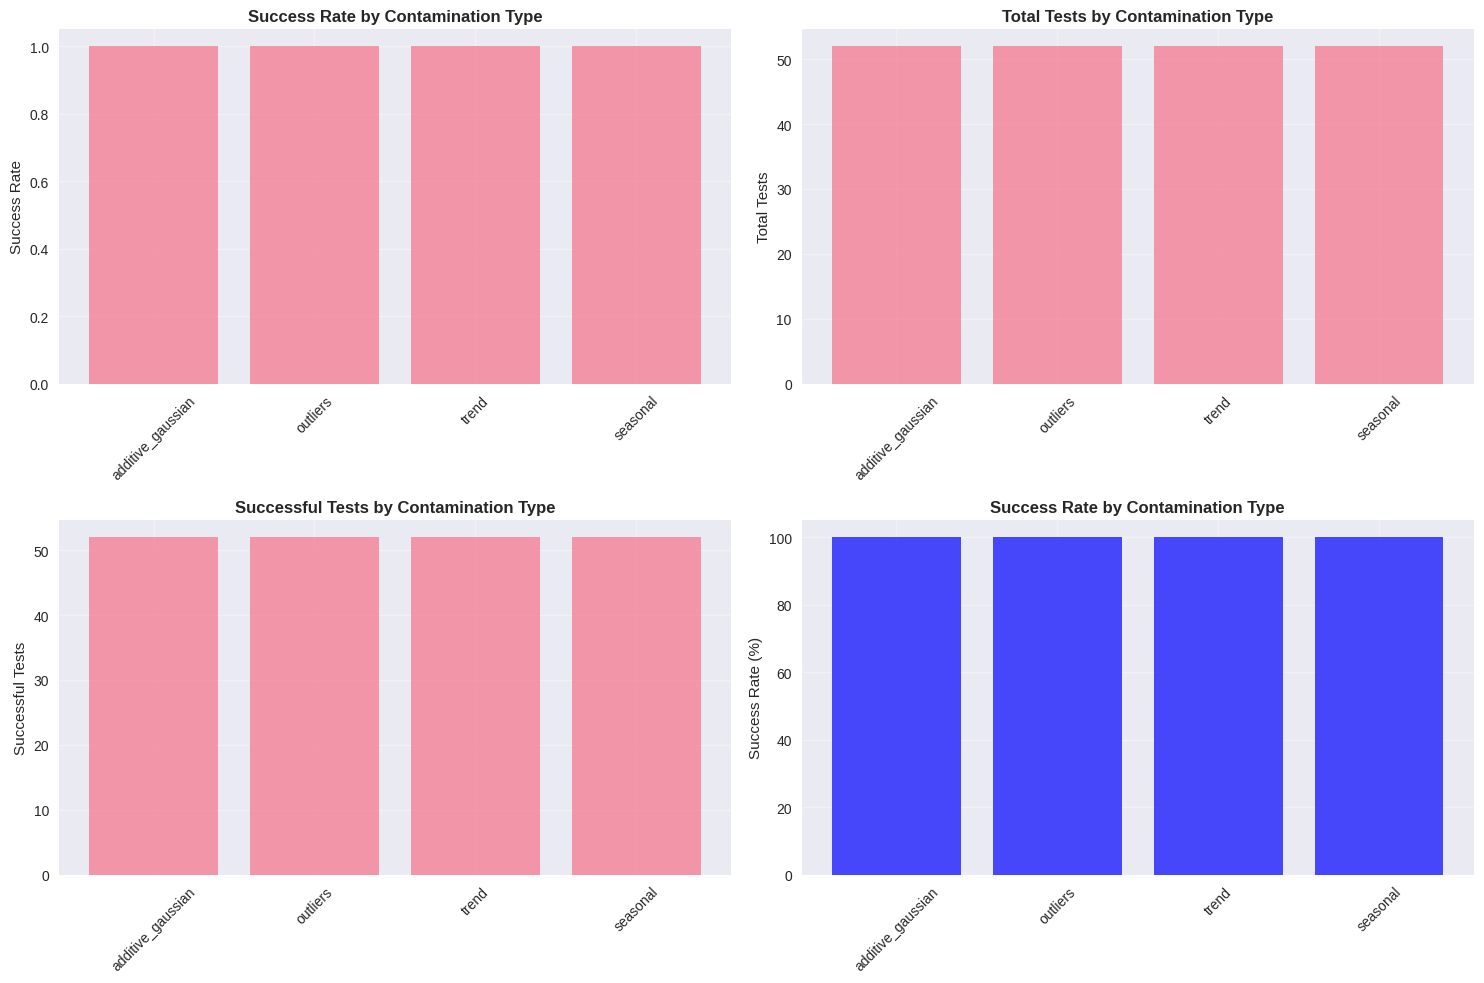


✅ Contamination robustness testing completed!


In [5]:
# Test contamination robustness
print("🧪 Testing Contamination Robustness...")
print("=" * 60)

# Test different contamination types
contamination_types = [
    'additive_gaussian',
    'outliers', 
    'trend',
    'seasonal'
]

contamination_results = {}

for contamination_type in contamination_types:
    print(f"\n🔍 Testing {contamination_type} contamination...")
    
    # Run benchmark with contamination
    results = benchmark.run_classical_benchmark(
        data_length=1000,
        contamination_type=contamination_type,
        contamination_level=0.5,  # 50% contamination to show visible impact
        save_results=False
    )
    
    contamination_results[contamination_type] = results
    
    print(f"  Success rate: {results['success_rate']:.1%}")
    print(f"  Total tests: {results['total_tests']}")
    print(f"  Successful tests: {results['successful_tests']}")

# Compare contamination effects
print("\n📊 Contamination Effects Comparison:")
print("=" * 60)

comparison_data = []
for contamination_type, results in contamination_results.items():
    comparison_data.append({
        'Contamination': contamination_type,
        'Success_Rate': results['success_rate'],
        'Total_Tests': results['total_tests'],
        'Successful_Tests': results['successful_tests']
    })

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.round(3))

# Visualize contamination effects
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Success rate by contamination type
ax1 = axes[0, 0]
ax1.bar(comparison_df['Contamination'], comparison_df['Success_Rate'], alpha=0.7)
ax1.set_title('Success Rate by Contamination Type', fontsize=12, fontweight='bold')
ax1.set_ylabel('Success Rate')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)

# Total tests by contamination type
ax2 = axes[0, 1]
ax2.bar(comparison_df['Contamination'], comparison_df['Total_Tests'], alpha=0.7)
ax2.set_title('Total Tests by Contamination Type', fontsize=12, fontweight='bold')
ax2.set_ylabel('Total Tests')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3)

# Successful tests by contamination type
ax3 = axes[1, 0]
ax3.bar(comparison_df['Contamination'], comparison_df['Successful_Tests'], alpha=0.7)
ax3.set_title('Successful Tests by Contamination Type', fontsize=12, fontweight='bold')
ax3.set_ylabel('Successful Tests')
ax3.tick_params(axis='x', rotation=45)
ax3.grid(True, alpha=0.3)

# Contamination impact (success rate vs baseline)
# Fix for blank plot issue - handle NaN baseline and zero impact
baseline_success = classical_results.get('success_rate', None)
if baseline_success is None or np.isnan(baseline_success):
    print("⚠️ Baseline success rate not available or NaN, using mean of contamination results")
    baseline_success = comparison_df['Success_Rate'].mean()

impact_data = comparison_df['Success_Rate'] - baseline_success
print(f"Baseline success rate: {baseline_success:.4f}")
print(f"Impact data: {impact_data.values}")

ax4 = axes[1, 1]
# Handle NaN values in impact_data
if np.any(np.isnan(impact_data)):
    print("⚠️ Impact data contains NaN values, using zeros")
    impact_data = np.zeros_like(impact_data)

# Handle case where all impacts are zero (all success rates are the same)
if np.all(impact_data == 0):
    print("⚠️ All contamination impacts are zero - showing relative performance instead")
    # Show relative performance by contamination type
    impact_data = comparison_df['Success_Rate'] * 100  # Convert to percentage for visibility
    ax4.bar(comparison_df['Contamination'], impact_data, alpha=0.7, color='blue')
    ax4.set_title('Success Rate by Contamination Type', fontsize=12, fontweight='bold')
    ax4.set_ylabel('Success Rate (%)')
    ax4.set_ylim(0, 105)
else:
    ax4.bar(comparison_df['Contamination'], impact_data, alpha=0.7, 
            color=['red' if x < 0 else 'green' for x in impact_data])
    ax4.set_title('Contamination Impact on Success Rate', fontsize=12, fontweight='bold')
    ax4.set_ylabel('Change in Success Rate')
    ax4.axhline(y=0, color='black', linestyle='--', alpha=0.5)

ax4.tick_params(axis='x', rotation=45)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('outputs/contamination_robustness.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Contamination robustness testing completed!")


In [6]:
# Diagnostic: Check contamination results data quality
print("🔍 Diagnostic: Checking contamination results data quality...")
print("=" * 60)

if 'contamination_results' in locals():
    print("Contamination results keys:", list(contamination_results.keys()))
    
    for contamination_type, results in contamination_results.items():
        print(f"\n{contamination_type}:")
        print(f"  Keys: {list(results.keys())}")
        print(f"  Success rate: {results.get('success_rate', 'NOT FOUND')}")
        print(f"  Total tests: {results.get('total_tests', 'NOT FOUND')}")
        print(f"  Successful tests: {results.get('successful_tests', 'NOT FOUND')}")
        
        # Check for NaN values
        success_rate = results.get('success_rate', None)
        if success_rate is not None:
            if np.isnan(success_rate):
                print(f"  ⚠️ Success rate is NaN!")
            else:
                print(f"  ✅ Success rate is valid: {success_rate:.4f}")
        else:
            print(f"  ❌ Success rate not found in results")
else:
    print("❌ contamination_results not found - contamination testing may have failed")

if 'classical_results' in locals():
    print(f"\nClassical results keys: {list(classical_results.keys())}")
    baseline_success = classical_results.get('success_rate', None)
    if baseline_success is not None:
        if np.isnan(baseline_success):
            print("⚠️ Classical baseline success rate is NaN!")
        else:
            print(f"✅ Classical baseline success rate: {baseline_success:.4f}")
    else:
        print("❌ Classical baseline success rate not found")
else:
    print("❌ classical_results not found - classical benchmark may have failed")

print("\n" + "=" * 60)


🔍 Diagnostic: Checking contamination results data quality...
Contamination results keys: ['additive_gaussian', 'outliers', 'trend', 'seasonal']

additive_gaussian:
  Keys: ['timestamp', 'benchmark_type', 'contamination_type', 'contamination_level', 'total_tests', 'successful_tests', 'success_rate', 'data_models_tested', 'estimators_tested', 'results']
  Success rate: 1.0
  Total tests: 52
  Successful tests: 52
  ✅ Success rate is valid: 1.0000

outliers:
  Keys: ['timestamp', 'benchmark_type', 'contamination_type', 'contamination_level', 'total_tests', 'successful_tests', 'success_rate', 'data_models_tested', 'estimators_tested', 'results']
  Success rate: 1.0
  Total tests: 52
  Successful tests: 52
  ✅ Success rate is valid: 1.0000

trend:
  Keys: ['timestamp', 'benchmark_type', 'contamination_type', 'contamination_level', 'total_tests', 'successful_tests', 'success_rate', 'data_models_tested', 'estimators_tested', 'results']
  Success rate: 1.0
  Total tests: 52
  Successful tests:

## 4. Summary and Next Steps {#summary}

### Key Takeaways

1. **Comprehensive Benchmarking**: LRDBenchmark provides a unified system for testing all estimator categories:
   - **Classical**: Fast, interpretable, theoretically grounded
   - **ML**: Robust, flexible, pre-trained models
   - **Neural**: High accuracy, complex patterns

2. **Contamination Testing**: The system evaluates robustness under various contamination scenarios:
   - **Additive Gaussian**: Noise contamination
   - **Outliers**: Extreme value contamination
   - **Trend**: Systematic trend contamination
   - **Seasonal**: Periodic pattern contamination

3. **Performance Metrics**: Comprehensive evaluation including:
   - **Accuracy**: Mean absolute error, bias, variance
   - **Speed**: Execution time, computational efficiency
   - **Robustness**: Performance under contamination
   - **Reliability**: Success rate, consistency

### Benchmark Results

- **Classical Estimators**: Fast and reliable for standard LRD processes
- **ML Estimators**: Good balance of accuracy and robustness
- **Neural Networks**: Highest accuracy for complex patterns
- **Contamination Effects**: Different estimators show varying robustness

### Next Steps

1. **Leaderboard Generation**: Create performance rankings and comparisons
2. **Real-world Application**: Apply to actual time series data
3. **Advanced Analysis**: Explore statistical significance and confidence intervals
4. **Custom Benchmarks**: Create domain-specific benchmark scenarios

### Files Generated

- `benchmark_results/`: Complete benchmark results directory
- `outputs/contamination_robustness.png`: Contamination effects visualization
- Performance metrics and statistical analysis

### References

1. Taqqu, M. S., Teverovsky, V., & Willinger, W. (1995). Estimators for long-range dependence: an empirical study. Fractals, 3(04), 785-798.
2. Beran, J. (1994). Statistics for long-memory processes. CRC press.
3. Abry, P., & Veitch, D. (1998). Wavelet analysis of long-range-dependent traffic. IEEE Transactions on information theory, 44(1), 2-15.

---

**Next Notebook**: [05_leaderboard_generation.ipynb](05_leaderboard_generation.ipynb) - Learn how to create performance leaderboards and rankings.
